<a href="https://colab.research.google.com/github/anirbansen3027/feature-engineering/blob/master/categorical_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Categorical variables**

The values of a categorical variable are selected from a group of categories, also called labels. Examples are gender (male or female) and marital status (never married, married, divorced or widowed). Other examples of categorical variables include:

Intended use of loan (debt-consolidation, car purchase, wedding expenses, ...)
Mobile network provider (Vodafone, Orange, ...)
Postcode
Categorical variables can be further categorised into ordinal and nominal variables.

**Ordinal categorical variables**

Categorical variable in which categories can be meaningfully ordered are called ordinal. For example:

Student's grade in an exam (A, B, C or Fail).
Days of the week can be ordinal with Monday = 1 and Sunday = 7.
Educational level, with the categories Elementary school, High school, College graduate and PhD ranked from 1 to 4.

**Nominal categorical variable**

There isn't an intrinsic order of the labels. For example, country of birth (Argentina, England, Germany) is nominal. Other examples of nominal variables include:

Postcode
Vehicle make (Citroen, Peugeot, ...)
There is nothing that indicates an intrinsic order of the labels, and in principle, they are all equal.

**NB:**

Sometimes categorical variables are coded as numbers when the data are recorded (e.g. gender may be coded as 0 for males and 1 for females). The variable is still categorical, despite the use of numbers.

In a similar way, individuals in a survey may be coded with a number that uniquely identifies them (for example to avoid storing personal information for confidentiality). This number is really a label, and the variable then categorical. The number has no meaning other than making it possible to uniquely identify the observation (in this case the interviewed subject).

Ideally, when we work with a dataset in a business scenario, the data will come with a dictionary that indicates if the numbers in the variables are to be considered as categories or if they are numerical. And if the numbers are categoriies, the dictionary would explain what they intend to represent.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Colab's file access feature
from google.colab import files
#retrieve uploaded file
uploaded = files.upload()
#move kaggle.json into the file where the api expects it to be there
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**About the dataset:**

Lending Club Loan Data :
Analyze Lending Club's issued loans (https://www.kaggle.com/wendykan/lending-club-loan-data)

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

In [4]:
!kaggle datasets download -d wendykan/lending-club-loan-data

100% 239M/240M [00:03<00:00, 75.3MB/s]
100% 240M/240M [00:03<00:00, 66.3MB/s]


In [5]:
!ls
!unzip 'lending-club-loan-data.zip'
!ls

lending-club-loan-data.zip  sample_data
Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                
database.sqlite        lending-club-loan-data.zip  sample_data
LCDataDictionary.xlsx  loan.csv


In [6]:
# let's load the dataset with just a few columns and a few rows,
# to speed things up

use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

data = pd.read_csv(
    'loan.csv', usecols=use_cols).sample(
        10000, random_state=44)  # set a seed for reproducibility

data.head()

,id,home_ownership,loan_status,purpose
131079,5554979,RENT,Current,debt_consolidation
384935,16552323,OWN,Current,car
73585,8185454,RENT,Fully Paid,credit_card
660814,56180166,RENT,Current,debt_consolidation
349757,16772363,RENT,Current,credit_card


In [7]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

Text(0, 0.5, 'Number of customers')

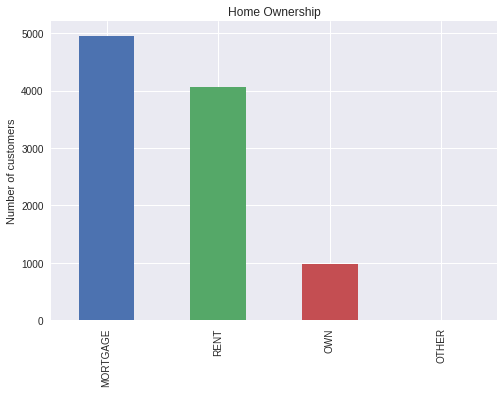

In [8]:
fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

In [10]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (31-120 days)', 'Issued', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (16-30 days)'], dtype=object)

Text(0, 0.5, 'Number of cutomers')

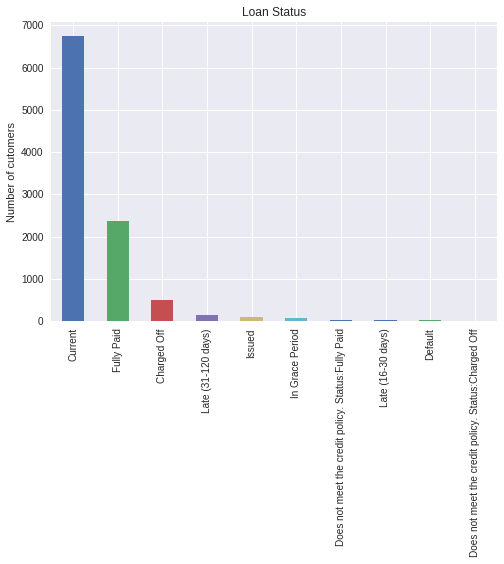

In [11]:
fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Loan Status')
fig.set_ylabel('Number of cutomers')

In [13]:
data.purpose.unique()

array(['debt_consolidation', 'car', 'credit_card', 'small_business',
       'house', 'moving', 'other', 'home_improvement', 'medical',
       'major_purchase', 'vacation', 'educational', 'wedding',
       'renewable_energy'], dtype=object)

Text(0, 0.5, 'No. of Customers')

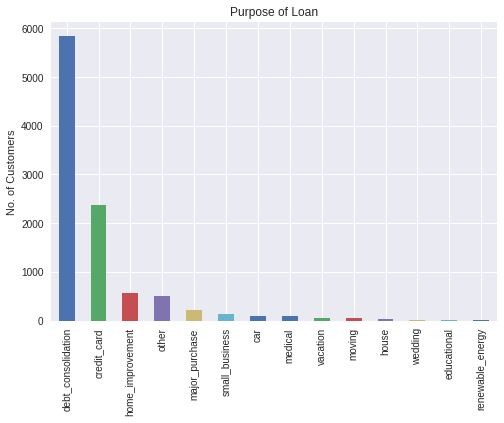

In [15]:
fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Purpose of Loan')
fig.set_ylabel('No. of Customers')

In [16]:
# finally, let's look at a variable that is numerical,
# but its numbers have no real meaning, and therefore
# should be better considered as a categorical one.

data['id'].head()

131079     5554979
384935    16552323
73585      8185454
660814    56180166
349757    16772363
Name: id, dtype: int64

In this case, each id represents one customer. This number is assigned in order to identify the customer if needed, while maintaining confidentiality.